**Analítica de Showz**

Showz es una empresa de venta de entradas de eventos, con el objetivo de optimizar los gastos de marketing se realizarán las siguientes investigaciones:
1. Cómo los clientes usan el servicio
2. Cuándo empiezan a comprar
3. Cuánto dinero aporta cada cliente a la compañía
4. Cuándo los ingresos cubren el costo de adquisición de los clientes

**Preparación de datos para el análisis**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:

visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.head(3)


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:

visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['source_id'] = visits['source_id'].astype('str')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['uid'] = visits['uid'].astype('str')
visits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  object        
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 13.7+ MB


In [6]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.head(3)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')
orders['uid'] = orders['uid'].astype('str')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [9]:
costs.head(3)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [11]:
costs['source_id'] = costs['source_id'].astype('str')
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   object        
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.7+ KB


**¿Cuántas personas lo usan cada día, semana y mes? ¿Cuántas sesiones hay por día?**

In [12]:
users_per_day = visits.groupby(visits['start_ts'].dt.date).agg(
    users_per_day=('uid', 'nunique'),
    sessions_per_day=('uid', 'count')
).reset_index()
users_per_day.head()

,start_ts,users_per_day,sessions_per_day
0,2017-06-01,605,664
1,2017-06-02,608,658
2,2017-06-03,445,477
3,2017-06-04,476,510
4,2017-06-05,820,893


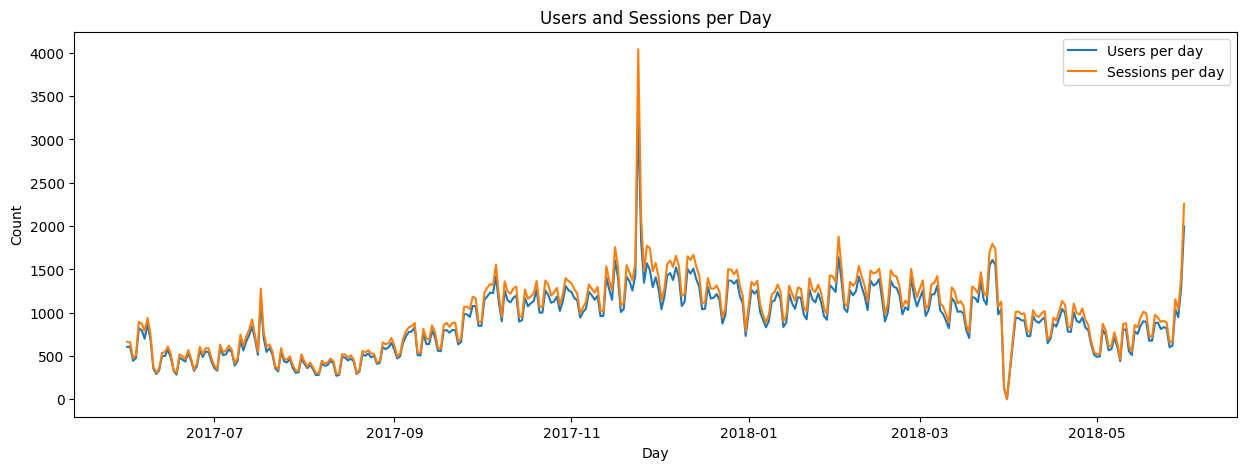

In [13]:
fig, ax = plt.subplots(figsize=(15,5))

# Primer gráfico
users_per_day.plot(x='start_ts', y='users_per_day', ax=ax, label='Users per day')

# Segundo gráfico
users_per_day.plot(x='start_ts', y='sessions_per_day', ax=ax, label='Sessions per day')

ax.set_title('Users and Sessions per Day')
ax.set_xlabel('Day')
ax.set_ylabel('Count')
plt.show()

In [14]:
users_per_week = (visits
    .groupby(visits['start_ts'].dt.to_period('W'))['uid']
    .nunique()
    .reset_index(name='users_per_week'))
users_per_week.head()

,start_ts,users_per_week
0,2017-05-29/2017-06-04,2021
1,2017-06-05/2017-06-11,4129
2,2017-06-12/2017-06-18,2812
3,2017-06-19/2017-06-25,2878
4,2017-06-26/2017-07-02,3064


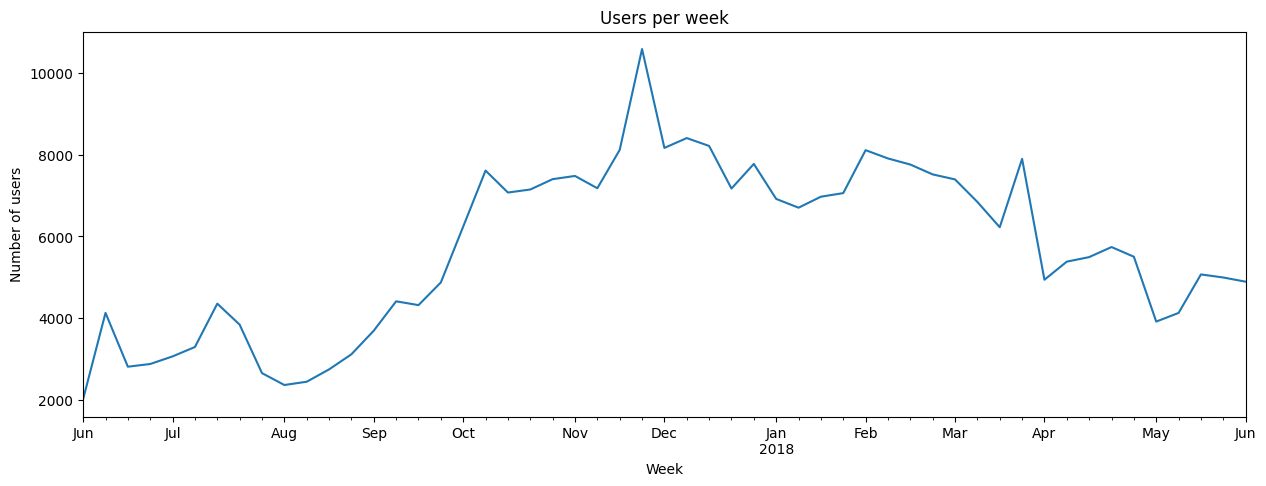

In [15]:
users_per_week.plot(x = 'start_ts',
                  y = 'users_per_week',
                  title= 'Users per week',
                  xlabel = 'Week',
                  ylabel = 'Number of users',
                  legend = False,
                  figsize = [15,5])
plt.show() 

In [16]:
users_per_month = (visits
    .groupby(visits['start_ts'].dt.to_period('M'))['uid']
    .nunique()
    .reset_index(name='users_per_month'))
users_per_month.head()

,start_ts,users_per_month
0,2017-06,13259
1,2017-07,14183
2,2017-08,11631
3,2017-09,18975
4,2017-10,29692


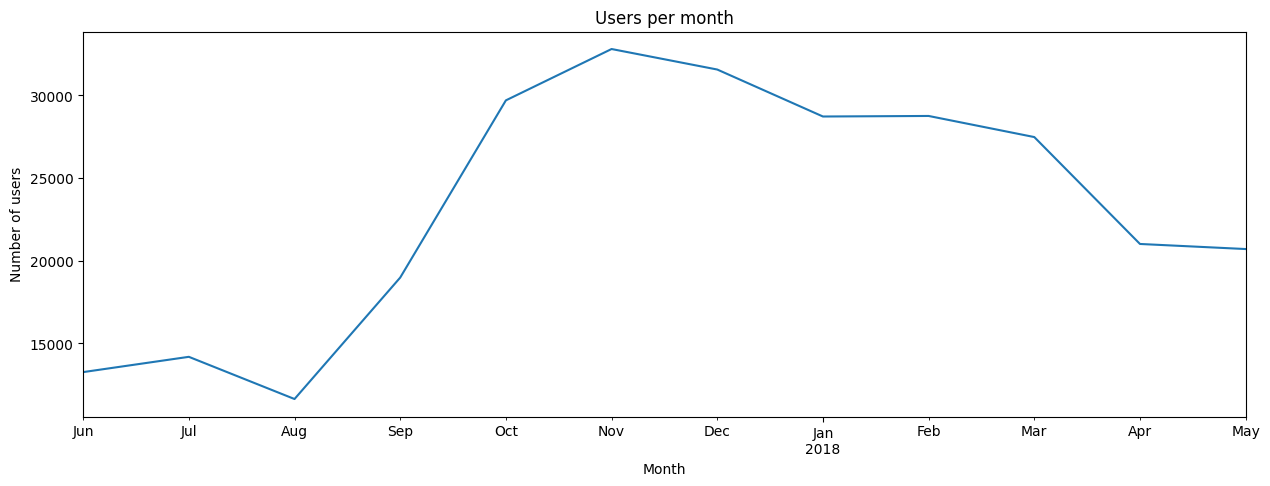

In [17]:
users_per_month.plot(x = 'start_ts',
                  y = 'users_per_month',
                  title= 'Users per month',
                  xlabel = 'Month',
                  ylabel = 'Number of users',
                  legend = False,
                  figsize = [15,5])
plt.show() 

Gracias a estas gráficas podemos observar que las ventas tuvieron un gran pico en el mes diciembre y a partir de ahí empezaron a bajar. Estos datos podrían ser preocupantes, sin embargo habría que analizar si esto se debe a un factor estacional. Quiza en el mes de diciembre hay un gran evento que dispara las ventas.

**¿Cuál es la duración de cada sesión?**

In [18]:
visits['sec_in_session'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head()

,device,end_ts,source_id,start_ts,uid,sec_in_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0


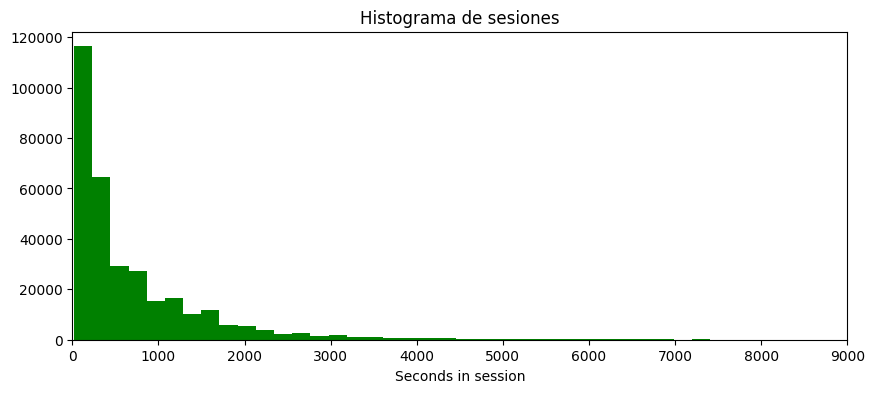

In [19]:

plt.figure(figsize=(10,4))
plt.hist(visits[visits['sec_in_session'] > 0]['sec_in_session'], bins=400, color = "green")
plt.xlim(0,9000)
plt.xlabel("Seconds in session")
plt.title("Histograma de sesiones")
plt.show()


In [20]:
print(f"The mode in the time per session is: {visits['sec_in_session'].mode()[0]} sec")

The mode in the time per session is: 60 sec


En su mayoría las sesiones duran 60 seguntos, antes de llegar a alguna conclusión tendriamos que checar si este es tiempo suficiente para que una persona complete la compra de sus boletos, si no lo es entonces habría que checar cuales son los pasos que se tienen que seguir para llegar a la compra y ver en que paso se estan quedando los clientes. 

**¿Con qué frecuencia los usuarios regresan?**

In [21]:
first_visit = visits.groupby('uid')['start_ts'].min().reset_index(name='first_visit')
first_visit.head()

,uid,first_visit
0,10000171586432207426,2017-12-01 15:11:00
1,10000344846682484395,2018-02-21 16:01:00
2,1000036778515242839,2017-09-05 20:22:00
3,10000460875579931334,2017-09-13 09:12:00
4,10000558740593440652,2018-01-03 18:39:00


In [22]:
visits = pd.merge(visits, first_visit, on = 'uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,sec_in_session,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680,2018-03-09 20:05:00


In [23]:
visits['first_visit_month'] = visits['first_visit'].dt.to_period('M')
visits['visit_month'] = visits['start_ts'].dt.to_period('M')
visits.head(3)

,device,end_ts,source_id,start_ts,uid,sec_in_session,first_visit,first_visit_month,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12-20 17:20:00,2017-12,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02-19 16:53:00,2018-02,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07-01 01:54:00,2017-07,2017-07


In [24]:
cohorts = visits.groupby(['first_visit_month', 'visit_month'])['uid'].nunique().reset_index(name='users_per_cohort')
cohorts['cohorts_number'] = (cohorts['visit_month'] - cohorts['first_visit_month']).apply(lambda x: x.n)
cohorts = cohorts[['first_visit_month','cohorts_number','users_per_cohort']]
cohorts.head()

,first_visit_month,cohorts_number,users_per_cohort
0,2017-06,0,13259
1,2017-06,1,1043
2,2017-06,2,713
3,2017-06,3,814
4,2017-06,4,909


In [25]:
initial_users_count = cohorts[cohorts['cohorts_number'] == 0][['first_visit_month', 'users_per_cohort']]
initial_users_count = initial_users_count.rename(columns={'users_per_cohort': 'first_cohort_users'})
initial_users_count.head()

,first_visit_month,first_cohort_users
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977


In [26]:
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
cohorts.head()

,first_visit_month,cohorts_number,users_per_cohort,first_cohort_users
0,2017-06,0,13259,13259
1,2017-06,1,1043,13259
2,2017-06,2,713,13259
3,2017-06,3,814,13259
4,2017-06,4,909,13259


In [27]:
cohorts['retention'] = (cohorts['users_per_cohort'] / cohorts['first_cohort_users'])*100
cohorts['retention'] = cohorts['retention'].round(1)
cohorts.head()

,first_visit_month,cohorts_number,users_per_cohort,first_cohort_users,retention
0,2017-06,0,13259,13259,100.0
1,2017-06,1,1043,13259,7.9
2,2017-06,2,713,13259,5.4
3,2017-06,3,814,13259,6.1
4,2017-06,4,909,13259,6.9


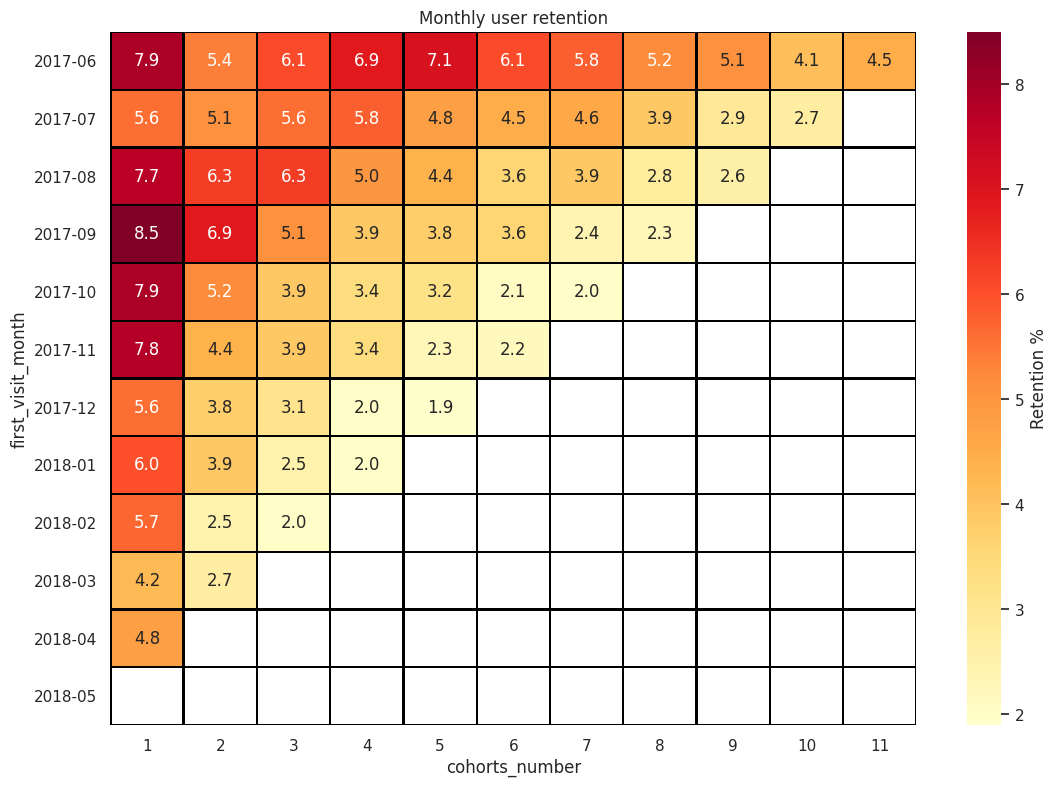

In [28]:
retention_pivot = cohorts.pivot_table(
    index='first_visit_month',      
    columns='cohorts_number',       
    values='retention',             
    aggfunc='sum')

retention_no0 = retention_pivot.drop(columns=0)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Monthly user retention')

sns.heatmap(
    retention_no0,
    annot=True,                   
    fmt='.1f',                       
    linewidths=1,
    linecolor='black',

    cmap='YlOrRd',

    cbar_kws={'label': 'Retention %'}
)

plt.show()


La taza de retención parece ser bastante baja pero debemos considerar que tipo de eventos son los que se están ofertando ya que en su mayoría la gente no va a eventos cada mes, sino cada que hay un evento de su interes. En este caso podría ser mejor hacer este análisis por año, sin embargo en este caso no contamos con suficiente información.

**¿Cuándo empieza la gente a comprar?**

In [29]:

orders = orders.merge(visits[['uid', 'start_ts', 'source_id']], on='uid', how='left')
orders.head()


,buy_ts,revenue,uid,start_ts,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,3


In [30]:
orders['user_client_min'] = (orders['buy_ts'] - orders['start_ts']).dt.seconds / 60
orders.head()

,buy_ts,revenue,uid,start_ts,source_id,user_client_min
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,3,27.0


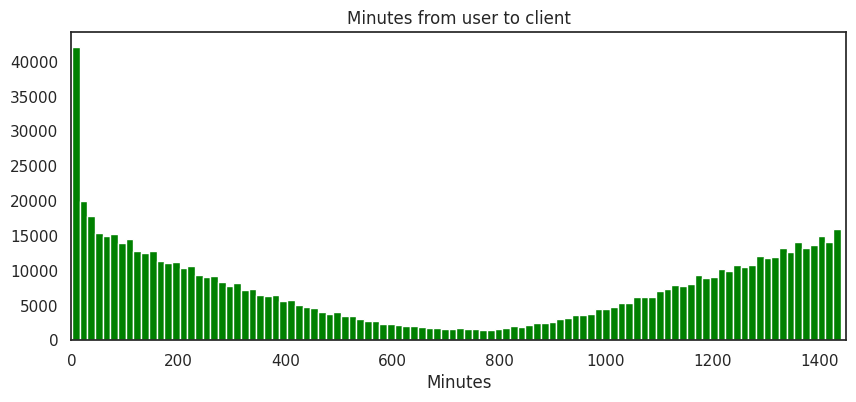

In [31]:
plt.figure(figsize=(10,4))
plt.hist(orders[orders['user_client_min']> 0]['user_client_min'], bins=100, color = "green")
plt.xlim(0,1450)
plt.xlabel("Minutes")
plt.title("Minutes from user to client")
plt.show()

In [32]:
print(f"The mode in the time from user to client is: {orders['user_client_min'].mode()[0]} min")
print(f"The mean in the time from user to client is: {orders['user_client_min'].mean()} min")

The mode in the time from user to client is: 1.0 min
The mean in the time from user to client is: 671.1469637322839 min


In [33]:
orders['dt'] = orders['buy_ts'].dt.date
orders['dt'] = pd.to_datetime(orders['dt'], format = '%Y-%m-%d')
orders = orders.merge(costs[['source_id','dt', 'costs']], on=['source_id','dt'], how='left')
orders.head(3)

,buy_ts,revenue,uid,start_ts,source_id,user_client_min,dt,costs
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1,1.0,2017-06-01,75.20
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2,11.0,2017-06-01,132.56
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2,2.0,2017-06-01,132.56


In [34]:
daily_cost_source = orders.pivot_table(index = 'dt', 
                                       columns = 'source_id', 
                                       values= 'costs', 
                                       aggfunc = 'first')
daily_cost_source.head(3)

source_id,1,10,2,3,4,5,9
dt,,,,,,,
2017-06-01,75.20,15.08,132.56,349.38,76.74,73.24,13.06
2017-06-02,62.25,11.18,132.38,314.22,59.21,123.82,18.13
2017-06-03,36.53,9.62,77.20,196.12,59.39,64.93,7.06


In [35]:
total_cost_per_source = daily_cost_source.sum(axis=0).reset_index(name = 'costs')
total_cost_per_source

,source_id,costs
0,1,20833.27
1,10,5690.77
2,2,42806.04
3,3,141321.63
4,4,61073.60
5,5,51756.40
6,9,5486.36


In [36]:
pd.set_option('display.float_format', '{:,.0f}'.format)
revenue_cost = orders.groupby('source_id').agg({'revenue': 'sum'})
revenue_cost = pd.merge(revenue_cost, total_cost_per_source, on = 'source_id')
revenue_cost['roi'] = ((revenue_cost['revenue'] - revenue_cost['costs']) / revenue_cost['costs']) * 100
revenue_cost.sort_values('roi', ascending= False)

,source_id,revenue,costs,roi
0,1,"2,298,200","20,833","10,931"
2,2,"2,638,189","42,806","6,063"
5,5,"1,181,477","51,756","2,183"
4,4,"496,690","61,074",713
6,9,"36,342","5,486",562
1,10,"14,619","5,691",157
3,3,"296,688","141,322",110


**Tiempo de conversión de usuario a cliente**

Nuestro historiograma nos ha mostrado que en su mayoría la gente realiza una compra ya sea dentro de las primeras 3 horas despues del primer inicio de seción o un día despues del inicio de seción, lo que nos deja claro que las personas descargan la app sólo cuando la necesita.

**Eficiencia en canales de márqueting**

En cuanto a la eficiencia de los conales podemos ver que los mejores son el canal 1, 2 y 5. Aunque los canales 4, 9, 10 y 3 tienen menor ROI que los primeros siguen teniendo un muy buen ROI


**¿Cuántos pedidos hacen durante un período de tiempo dado?**

In [37]:
orders['month_buy'] = orders['buy_ts'].dt.to_period('M')
orders.head()

,buy_ts,revenue,uid,start_ts,source_id,user_client_min,dt,costs,month_buy
0,2017-06-01 00:10:00,17,10329302124590727494,2017-06-01 00:09:00,1,1,2017-06-01,75,2017-06
1,2017-06-01 00:25:00,1,11627257723692907447,2017-06-01 00:14:00,2,11,2017-06-01,133,2017-06
2,2017-06-01 00:27:00,0,17903680561304213844,2017-06-01 00:25:00,2,2,2017-06-01,133,2017-06
3,2017-06-01 00:29:00,1,16109239769442553005,2017-06-01 00:14:00,2,15,2017-06-01,133,2017-06
4,2017-06-01 07:58:00,0,14200605875248379450,2017-06-01 07:31:00,3,27,2017-06-01,349,2017-06


In [38]:
purchase_per_month = orders.groupby(['uid', 'month_buy']).size().reset_index(name='n_buys')
purchase_per_month.head(3)

,uid,month_buy,n_buys
0,10000837700716403746,2017-06,7
1,10000997030965831953,2018-01,1
2,10001199569370567060,2017-11,14


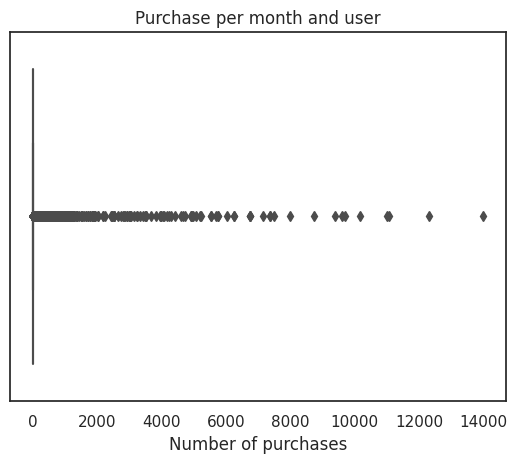

In [39]:
sns.boxplot(purchase_per_month['n_buys'])
plt.xlabel("Number of purchases")
plt.title("Purchase per month and user")
plt.show()

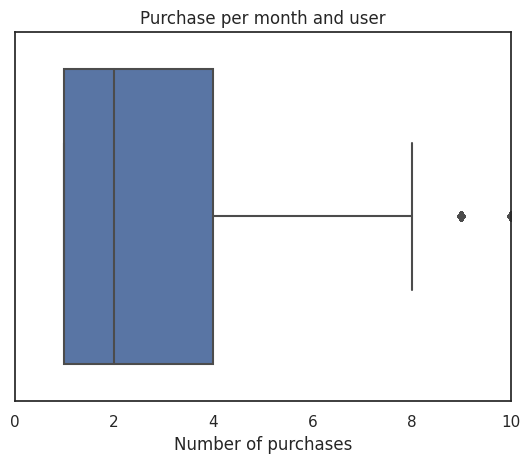

In [40]:
sns.boxplot(purchase_per_month['n_buys'])
plt.xlim([0,10]) 
plt.xlabel("Number of purchases")
plt.title("Purchase per month and user")
plt.show()

En su mayoría los clientes hacen de 1 a 4 compras al mes pero podemos ver que hay usuarios que hacen compras mucho mayores, quizaz estos son revendedores? o quizas se hacen compras mediante otras plataformas y todas se registran como si vinieran del mismo usuario

**¿Cuál es el tamaño promedio de compra?**

In [41]:
mean_revenue_per_buy = orders[orders['revenue'] > 0]['revenue'].mean()
print("Tamaño promedio de compra: $", mean_revenue_per_buy.round(2))

Tamaño promedio de compra: $ 9.16


**¿Cuánto dinero traen? (LTV)**

In [42]:
ltv = orders.groupby('uid')['revenue'].sum().reset_index(name = 'revenue_per_uid')
ltv = ltv['revenue_per_uid'].mean()
print("En promedio cada cliente trae a la empresa: $",ltv.round(2))

En promedio cada cliente trae a la empresa: $ 190.63


**¿Cuánto dinero se gastó?**

In [43]:
revenue_cost

,source_id,revenue,costs,roi
0,1,"2,298,200","20,833","10,931"
1,10,"14,619","5,691",157
2,2,"2,638,189","42,806","6,063"
3,3,"296,688","141,322",110
4,4,"496,690","61,074",713
5,5,"1,181,477","51,756","2,183"
6,9,"36,342","5,486",562


**¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

In [44]:
n_new_users = orders.groupby('source_id').agg({'uid': 'nunique'})
revenue_cost = pd.merge(revenue_cost, n_new_users, on = 'source_id')
revenue_cost

,source_id,revenue,costs,roi,uid
0,1,"2,298,200","20,833","10,931",7138
1,10,"14,619","5,691",157,1773
2,2,"2,638,189","42,806","6,063",7305
3,3,"296,688","141,322",110,13846
4,4,"496,690","61,074",713,14253
5,5,"1,181,477","51,756","2,183",10156
6,9,"36,342","5,486",562,2793


In [45]:
revenue_cost['cac'] =  revenue_cost['costs'] / revenue_cost['uid']
revenue_cost['ltv'] =  revenue_cost['revenue'] / revenue_cost['uid']
revenue_cost

,source_id,revenue,costs,roi,uid,cac,ltv
0,1,"2,298,200","20,833","10,931",7138,3,322
1,10,"14,619","5,691",157,1773,3,8
2,2,"2,638,189","42,806","6,063",7305,6,361
3,3,"296,688","141,322",110,13846,10,21
4,4,"496,690","61,074",713,14253,4,35
5,5,"1,181,477","51,756","2,183",10156,5,116
6,9,"36,342","5,486",562,2793,2,13


En todas las fuentes de adquisición LTV es mayor a CAC. Las finanzas de Showz están en orden.

**¿Cuán rentables eran las inversiones? (ROMI)**

In [46]:
revenue_cost['romi'] = (revenue_cost['revenue'] / revenue_cost['costs']) * 100
revenue_cost

,source_id,revenue,costs,roi,uid,cac,ltv,romi
0,1,"2,298,200","20,833","10,931",7138,3,322,"11,031"
1,10,"14,619","5,691",157,1773,3,8,257
2,2,"2,638,189","42,806","6,063",7305,6,361,"6,163"
3,3,"296,688","141,322",110,13846,10,21,210
4,4,"496,690","61,074",713,14253,4,35,813
5,5,"1,181,477","51,756","2,183",10156,5,116,"2,283"
6,9,"36,342","5,486",562,2793,2,13,662


Como no contamos con el costo del producto se sacó el ROMI simplificado

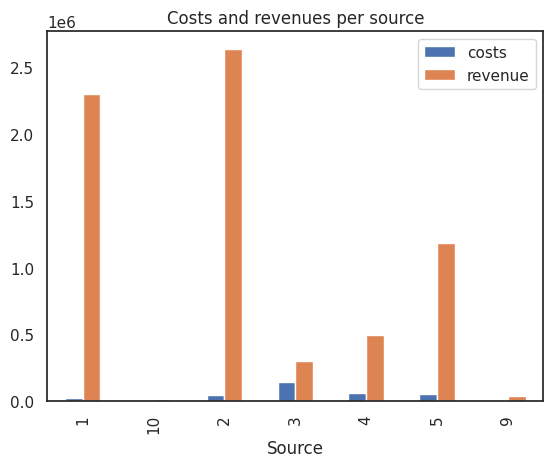

In [47]:

revenue_cost.plot(kind = 'bar',
                  x = 'source_id',
                  y = ['costs', 'revenue'],
                  title = 'Costs and revenues per source', 
                  xlabel = 'Source') 
plt.show() 


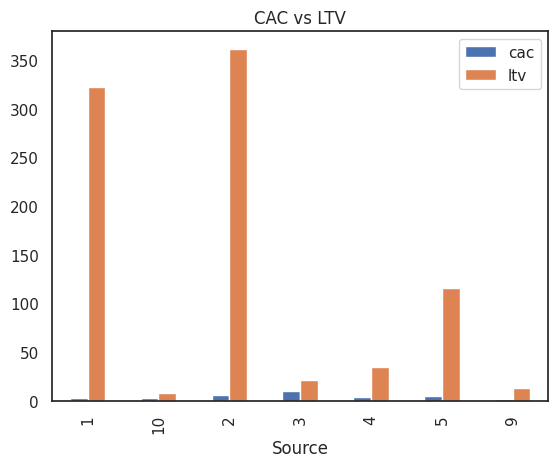

In [48]:

revenue_cost.plot(kind = 'bar',
                  x = 'source_id',
                  y = ['cac', 'ltv'],
                  title = 'CAC vs LTV', 
                  xlabel = 'Source') 
plt.show() 



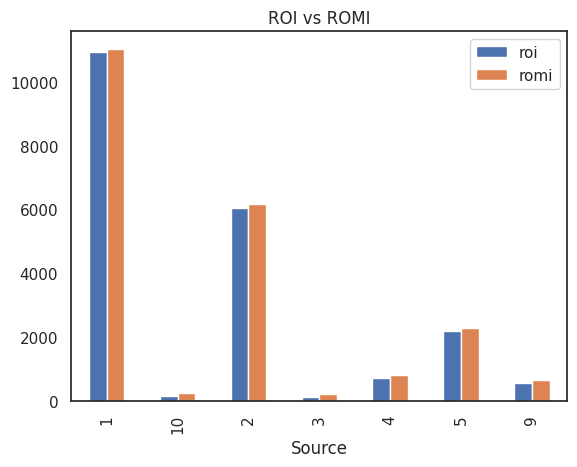

In [49]:
revenue_cost.plot(kind = 'bar',
                  x = 'source_id',
                  y = ['roi', 'romi'],
                  title = 'ROI vs ROMI', 
                  xlabel = 'Source') 
plt.show() 


**Conclusión y recomendación de inversión en marketing:**

Analizando los datos de las fuentes de adquisición, se observa que la fuente 1 y la fuente 2 presentan los mejores indicadores de eficiencia: tienen ROI y ROMI altos, lo que indica que cada peso invertido genera un retorno significativo. Además, su LTV por cliente es considerable, lo que sugiere que los usuarios adquiridos aportan valor a largo plazo. Por lo tanto, recomiendo priorizar la inversión en estas dos fuentes, asegurando que se mantenga o incluso se aumente el presupuesto destinado a ellas para maximizar los ingresos.

La fuente 5 también es atractiva, con un ROI y ROMI sólidos, aunque menores que las dos anteriores, pero aún representativos. Por eso, sugeriría mantener o incrementar ligeramente la inversión en esta fuente.

En cuanto a las otras fuentes:

-La fuente 3, a pesar de haber recibido una inversión considerable, muestra el ROI más bajo y un ROMI bajo, lo que indica que no es eficiente. Por ello, recomiendo reducir la inversión en esta fuente, destinando esos recursos a las más rentables.

-Las fuentes 4, 9 y 10 muestran rendimientos moderados. Sugiero mantener la inversión pero sin incrementarla, enfocándose en optimizar campañas y segmentación para mejorar su rendimiento.